This notebook reads in the CDF files and makes the plots for the CDFs at 150pc. 
This plots both the entire SNe sample and the SN sample by type.
It then calculates the percentiles and mean of each group of MGSD measurements and reports them in a latex table.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from astropy import table
from astropy.table import Table, join
from astropy.io import ascii
import astropy.io.fits as pyfits
import seaborn as sns

import os

import sys
sys.path.append('/home/mayker.1/Desktop/PythonFunctions')
#sys.path.append('/Users/nessmayker/Desktop/NessPythonFunctions')
from detectionFraction import detecFrac
from cumulativeDistFunc import makeCDF
from findPercentiles import findStats
from flattenList import flatten

colorSingle = "purple"
# color1of3   = "chocolate"
# color2of3   = "forestgreen" 
# color3of3   = "indigo"
# color1of3   = "#F5793A"
# color2of3   = "#A95AA1" 
color3of3   = "#382119"
color1of3   = "purple"
color2of3   = "orange" 
#color3of3   = "black"

In [2]:
# Convert MGSD to Mass

area = (150.0/2.0)**2*np.pi/np.log(2.0)

def mgsd2mass(x, rnd = None):
    y = np.log10(area) + x
    
    if rnd == None:
        pass
   
    else:
        for i in range(len(y)):
            y[i] = round(y[i],rnd)
    return(y)
        
        

def mass2mgsd(x):
    y = x - np.log10(area)
    return(y)

def makeLog(inputArr):
    outputArr = []
    for i in range(len(inputArr)):
        outputArr.append(np.log10(inputArr[i])) 
    return(outputArr)


In [3]:
# Import supernovae CDFs

SNeCDFsFile   = "../Data/3.2a.SNeCDFs.fits"
SNeCDFs = Table.read(SNeCDFsFile)

SNeCDFs["Detections"]

1.5547443628311157 .. 260.3741149902344
0.4406779661016949 .. 1.0
9.159460320075235 .. 887.0885658286992
0.4406779661016949 .. 1.0


In [4]:
# IMPORT ALL CDFS and x & y coords for plots
# D: Detection, ND: NonDetection, SM: Sigma Mol, M: Mass, PP: Per Pixel
# CDFSN Supernova info CDF
# CDFAP All map Pixels CDF

CDFSN_D_x, CDFSN_D_y = SNeCDFs["Detections"][0], SNeCDFs["Detections"][1]
CDFSN_D_SM_x, CDFSN_D_SM_y = SNeCDFs["Detections"][2], SNeCDFs["Detections"][3] 

CDFSN_ND_x, CDFSN_ND_y = SNeCDFs["NonDetections"][0], SNeCDFs["NonDetections"][1]
CDFSN_ND_SM_x, CDFSN_ND_SM_y = SNeCDFs["NonDetections"][2], SNeCDFs["NonDetections"][3]

CDFSN_D_II_x, CDFSN_D_II_y = SNeCDFs["DetectionsII"][0], SNeCDFs["DetectionsII"][1]
CDFSN_D_SM_II_x, CDFSN_D_SM_II_y = SNeCDFs["DetectionsII"][2], SNeCDFs["DetectionsII"][3] 

CDFSN_ND_II_x, CDFSN_ND_II_y = SNeCDFs["NonDetectionsII"][0], SNeCDFs["NonDetectionsII"][1]
CDFSN_ND_SM_II_x, CDFSN_ND_SM_II_y = SNeCDFs["NonDetectionsII"][2], SNeCDFs["NonDetectionsII"][3]

CDFSN_D_Ia_x, CDFSN_D_Ia_y = SNeCDFs["DetectionsIa"][0], SNeCDFs["DetectionsIa"][1]
CDFSN_D_SM_Ia_x, CDFSN_D_SM_Ia_y = SNeCDFs["DetectionsIa"][2], SNeCDFs["DetectionsIa"][3] 

CDFSN_ND_Ia_x, CDFSN_ND_Ia_y = SNeCDFs["NonDetectionsIa"][0], SNeCDFs["NonDetectionsIa"][1]
CDFSN_ND_SM_Ia_x, CDFSN_ND_SM_Ia_y = SNeCDFs["NonDetectionsIa"][2], SNeCDFs["NonDetectionsIa"][3]

CDFSN_D_SESN_x, CDFSN_D_SESN_y = SNeCDFs["DetectionsSESN"][0], SNeCDFs["DetectionsSESN"][1]
CDFSN_D_SM_SESN_x, CDFSN_D_SM_SESN_y = SNeCDFs["DetectionsSESN"][2], SNeCDFs["DetectionsSESN"][3] 

CDFSN_ND_SESN_x, CDFSN_ND_SESN_y = SNeCDFs["NonDetectionsSESN"][0], SNeCDFs["NonDetectionsSESN"][1]
CDFSN_ND_SM_SESN_x, CDFSN_ND_SM_SESN_y = SNeCDFs["NonDetectionsSESN"][2], SNeCDFs["NonDetectionsSESN"][3]

CDFSN_D_UnC_x, CDFSN_D_UnC_y = SNeCDFs["DetectionsUnC"][0], SNeCDFs["DetectionsUnC"][1]
CDFSN_D_SM_UnC_x, CDFSN_D_SM_UnC_y = SNeCDFs["DetectionsUnC"][2], SNeCDFs["DetectionsUnC"][3] 

CDFSN_ND_UnC_x, CDFSN_ND_UnC_y = SNeCDFs["NonDetectionsUnC"][0], SNeCDFs["NonDetectionsUnC"][1]
CDFSN_ND_SM_UnC_x, CDFSN_ND_SM_UnC_y = SNeCDFs["NonDetectionsUnC"][2], SNeCDFs["NonDetectionsUnC"][3]

# Import All Pixel CDFs

CDFAP_D_File     = "../Data/3.2a_CDFAllPixelsDetections.fits"
CDFAP_ND_File    = "../Data/3.2a_CDFAllPixelsNonDetections.fits"

CDFAP_D_SM_File  = "../Data/3.2a_CDFAllPixelsDetectionSigmaMol.fits"
CDFAP_ND_SM_File = "../Data/3.2a_CDFAllPixelsNonDetectionSigmaMol.fits"

CDFAP_D_M_File = "../Data/3.2a_CDFAllPixelsDetectionMass.fits"
CDFAP_ND_M_File = "../Data/3.2a_CDFAllPixelsNonDetectionMass.fits"

CDFAP_D_SM_PP_File  = "../Data/3.2a_CDFAllPixelsDetectionSigmaMolPerPixel.fits"
CDFAP_ND_SM_PP_File = "../Data/3.2a_CDFAllPixelsNonDetectionSigmaMolPerPixel.fits"

CDFAP_D_M_PP_File  = "../Data/3.2a_CDFAllPixelsDetectionMassPerPixel.fits"
CDFAP_ND_M_PP_File = "../Data/3.2a_CDFAllPixelsNonDetectionMassPerPixel.fits"

CDFAP_D          = Table.read(CDFAP_D_File)
CDFAP_ND         = Table.read(CDFAP_ND_File) 
CDFAP_D_SM       = Table.read(CDFAP_D_SM_File) 
CDFAP_ND_SM      = Table.read(CDFAP_ND_SM_File) 
CDFAP_D_M        = Table.read(CDFAP_D_M_File)
CDFAP_ND_M       = Table.read(CDFAP_ND_M_File) 
CDFAP_D_SM_PP    = Table.read(CDFAP_D_SM_PP_File) 
CDFAP_ND_SM_PP   = Table.read(CDFAP_ND_SM_PP_File)
CDFAP_D_M_PP     = Table.read(CDFAP_D_M_PP_File)
CDFAP_ND_M_PP    = Table.read(CDFAP_ND_M_PP_File) 


AP_D_x, AP_D_y             = CDFAP_D["CDFAllPixelsDetections"][0], CDFAP_D["CDFAllPixelsDetections"][1]
AP_D_SM_x, AP_D_SM_y       = CDFAP_D_SM["CDFAllPixelsDetectionSigmaMol"][0], CDFAP_D_SM["CDFAllPixelsDetectionSigmaMol"][1]
AP_D_M_x, AP_D_M_y         = CDFAP_D_M["CDFAllPixelsDetectionMass"][0], CDFAP_D_M["CDFAllPixelsDetectionMass"][1]
AP_D_SM_PP_x, AP_D_SM_PP_y = CDFAP_D_SM_PP["CDFAllPixelsDetectionSigmaMolPerPixel"][0], CDFAP_D_SM_PP["CDFAllPixelsDetectionSigmaMolPerPixel"][1]
AP_D_M_PP_x, AP_D_M_PP_y   = CDFAP_D_M_PP["CDFAllPixelsDetectionMassPerPixel"][0], CDFAP_D_M_PP["CDFAllPixelsDetectionMassPerPixel"][1]

AP_ND_x, AP_ND_y             = CDFAP_ND["CDFAllPixelsNonDetections"][0], CDFAP_ND["CDFAllPixelsNonDetections"][1]
AP_ND_SM_x, AP_ND_SM_y       = CDFAP_ND_SM["CDFAllPixelsNonDetectionSigmaMol"][0], CDFAP_ND_SM["CDFAllPixelsNonDetectionSigmaMol"][1]
AP_ND_M_x, AP_ND_M_y         = CDFAP_ND_M["CDFAllPixelsNonDetectionMass"][0], CDFAP_ND_M["CDFAllPixelsNonDetectionMass"][1]
AP_ND_SM_PP_x, AP_ND_SM_PP_y = CDFAP_ND_SM_PP["CDFAllPixelsNonDetectionSigmaMolPerPixel"][0], CDFAP_ND_SM_PP["CDFAllPixelsNonDetectionSigmaMolPerPixel"][1]
AP_ND_M_PP_x, AP_ND_M_PP_y   = CDFAP_ND_M_PP["CDFAllPixelsNonDetectionMassPerPixel"][0], CDFAP_ND_M_PP["CDFAllPixelsNonDetectionMassPerPixel"][1]


In [5]:
# Convert functions to log for plot

logCDFAP_D_x       = makeLog(AP_D_x)
logCDFAP_D_SM_x    = makeLog(AP_D_SM_x)
logCDFAP_D_M_x     = makeLog(AP_D_M_x)
logCDFAP_D_SM_PP_x = makeLog(AP_D_SM_PP_x)
logCDFAP_D_M_PP_x  = makeLog(AP_D_M_PP_x)

logCDFAP_ND_x       = makeLog(AP_ND_x)
logCDFAP_ND_SM_x    = makeLog(AP_ND_SM_x)
logCDFAP_ND_M_x     = makeLog(AP_ND_M_x)
logCDFAP_ND_SM_PP_x = makeLog(AP_ND_SM_PP_x)
logCDFAP_ND_M_PP_x  = makeLog(AP_ND_M_PP_x)

logCDFSN_ND_x         = makeLog(CDFSN_ND_x)
logCDFSN_ND_SM_x      = makeLog(CDFSN_ND_SM_x)
logCDFSN_ND_II_x      = makeLog(CDFSN_ND_II_x)
logCDFSN_ND_SM_II_x   = makeLog(CDFSN_ND_SM_II_x)
logCDFSN_ND_Ia_x      = makeLog(CDFSN_ND_Ia_x)
logCDFSN_ND_SM_Ia_x   = makeLog(CDFSN_ND_SM_Ia_x)
logCDFSN_ND_SESN_x    = makeLog(CDFSN_ND_SESN_x)
logCDFSN_ND_SM_SESN_x = makeLog(CDFSN_ND_SM_SESN_x)
logCDFSN_ND_UnC_x     = makeLog(CDFSN_ND_UnC_x)
logCDFSN_ND_SM_UnC_x  = makeLog(CDFSN_ND_SM_UnC_x)

logCDFSN_D_x          = makeLog(CDFSN_D_x)
logCDFSN_D_SM_x       = makeLog(CDFSN_D_SM_x)
logCDFSN_D_II_x       = makeLog(CDFSN_D_II_x)
logCDFSN_D_SM_II_x    = makeLog(CDFSN_D_SM_II_x)
logCDFSN_D_Ia_x       = makeLog(CDFSN_D_Ia_x)
logCDFSN_D_SM_Ia_x    = makeLog(CDFSN_D_SM_Ia_x)
logCDFSN_D_SESN_x     = makeLog(CDFSN_D_SESN_x)
logCDFSN_D_SM_SESN_x  = makeLog(CDFSN_D_SM_SESN_x)
logCDFSN_D_UnC_x      = makeLog(CDFSN_D_UnC_x)
logCDFSN_D_SM_UnC_x   = makeLog(CDFSN_D_SM_UnC_x)

 

<ipython-input-2-3dca540be627>:25: RuntimeWarning: divide by zero encountered in log10
  outputArr.append(np.log10(inputArr[i]))


In [6]:
print((logCDFAP_ND_M_x[1091016]))

3.652399671174911


In [7]:
# Convert SN Sigma Mol CDFs to mass

CDFSN_D_M_x, CDFSN_D_M_y   = CDFSN_D_SM_x * area, CDFSN_D_SM_y
CDFSN_ND_M_x, CDFSN_ND_M_y = CDFSN_ND_SM_x * area, CDFSN_ND_SM_y
CDFSN_D_M_II_x, CDFSN_D_M_II_y   = CDFSN_D_SM_II_x * area, CDFSN_D_SM_II_y
CDFSN_ND_M_II_x, CDFSN_ND_M_II_y = CDFSN_ND_SM_II_x * area, CDFSN_ND_SM_II_y
CDFSN_D_M_Ia_x, CDFSN_D_M_Ia_y   = CDFSN_D_SM_Ia_x * area, CDFSN_D_SM_Ia_y
CDFSN_ND_M_Ia_x, CDFSN_ND_M_Ia_y = CDFSN_ND_SM_Ia_x * area, CDFSN_ND_SM_Ia_y
CDFSN_D_M_SESN_x, CDFSN_D_M_SESN_y   = CDFSN_D_SM_SESN_x * area, CDFSN_D_SM_SESN_y
CDFSN_ND_M_SESN_x, CDFSN_ND_M_SESN_y = CDFSN_ND_SM_SESN_x * area, CDFSN_ND_SM_SESN_y

logCDFSN_D_M_x  = makeLog(CDFSN_D_M_x)
logCDFSN_ND_M_x = makeLog(CDFSN_ND_M_x)

logCDFSN_D_M_II_x  = makeLog(CDFSN_D_M_II_x)
logCDFSN_ND_M_II_x = makeLog(CDFSN_ND_M_II_x)

logCDFSN_D_M_Ia_x  = makeLog(CDFSN_D_M_Ia_x)
logCDFSN_ND_M_Ia_x = makeLog(CDFSN_ND_M_Ia_x)

logCDFSN_D_M_SESN_x  = makeLog(CDFSN_D_M_SESN_x)
logCDFSN_ND_M_SESN_x = makeLog(CDFSN_ND_M_SESN_x)


# Make detections only CDF for only detections plot
def makeCDF2(sortedArr):
    sortedArr=np.asarray(sortedArr)
    keep = np.isfinite(sortedArr)
    sortArr=sortedArr[keep]
    resArr = np.sort(sortArr)
    resCS = np.cumsum(resArr)/np.sum(resArr)
    perArr = np.interp([0.16, 0.5, 0.84],resCS,resArr)
    resArr = np.log10(resArr)
    return(resArr,resCS,perArr)

# logCDFSN_D_only_M_x, logCDFSN_D_only_M_y, logCDFSN_D_only_M_per = makeCDF2(logCDFSN_D_M_x)
# logCDFAP_D_only_M_x, logCDFAP_D_only_M_y, logCDFAP_D_only_M_per = makeCDF2(logCDFAP_D_M_x)
# logCDFAP_D_only_M_PP_x, logCDFAP_D_only_M_PP_y, logCDFAP_D_only_M_PP_per = makeCDF2(logCDFAP_D_M_PP_x)
# logCDFSN_D_only_M_II_x, logCDFSN_D_only_M_II_y, logCDFSN_D_only_M_II_per = makeCDF2(logCDFSN_D_M_II_x)
# logCDFSN_D_only_M_Ia_x, logCDFSN_D_only_M_Ia_y, logCDFSN_D_only_M_Ia_per = makeCDF2(logCDFSN_D_M_Ia_x)
# logCDFSN_D_only_M_SESN_x, logCDFSN_D_only_M_SESN_y, logCDFSN_D_only_M_SESN_per = makeCDF2(logCDFSN_D_M_SESN_x)

# logCDFSN_D_only_SM_x, logCDFSN_D_only_SM_y, logCDFSN_D_only_SM_per = makeCDF2(logCDFSN_D_SM_x)
# logCDFAP_D_only_SM_x, logCDFAP_D_only_SM_y, logCDFAP_D_only_SM_per = makeCDF2(logCDFAP_D_SM_x)
# logCDFAP_D_only_SM_PP_x, logCDFAP_D_only_SM_PP_y, logCDFAP_D_only_SM_PP_per = makeCDF2(logCDFAP_D_SM_PP_x)
# logCDFSN_D_only_SM_II_x, logCDFSN_D_only_SM_II_y, logCDFSN_D_only_SM_II_per = makeCDF2(logCDFSN_D_SM_II_x)
# logCDFSN_D_only_SM_Ia_x, logCDFSN_D_only_SM_Ia_y, logCDFSN_D_only_SM_Ia_per = makeCDF2(logCDFSN_D_SM_Ia_x)
# logCDFSN_D_only_SM_SESN_x, logCDFSN_D_only_SM_SESN_y, logCDFSN_D_only_SM_SESN_per = makeCDF2(logCDFSN_D_SM_SESN_x)

logCDFSN_D_only_M_x, logCDFSN_D_only_M_y, logCDFSN_D_only_M_per = makeCDF2(CDFSN_D_M_x)
logCDFAP_D_only_M_x, logCDFAP_D_only_M_y, logCDFAP_D_only_M_per = makeCDF2(AP_D_M_x)
logCDFAP_D_only_M_PP_x, logCDFAP_D_only_M_PP_y, logCDFAP_D_only_M_PP_per = makeCDF2(AP_D_M_PP_x)
logCDFSN_D_only_M_II_x, logCDFSN_D_only_M_II_y, logCDFSN_D_only_M_II_per = makeCDF2(CDFSN_D_M_II_x)
logCDFSN_D_only_M_Ia_x, logCDFSN_D_only_M_Ia_y, logCDFSN_D_only_M_Ia_per = makeCDF2(CDFSN_D_M_Ia_x)
logCDFSN_D_only_M_SESN_x, logCDFSN_D_only_M_SESN_y, logCDFSN_D_only_M_SESN_per = makeCDF2(CDFSN_D_M_SESN_x)

logCDFSN_D_only_SM_x, logCDFSN_D_only_SM_y, logCDFSN_D_only_SM_per = makeCDF2(CDFSN_D_SM_x)
logCDFAP_D_only_SM_x, logCDFAP_D_only_SM_y, logCDFAP_D_only_SM_per = makeCDF2(AP_D_SM_x)
logCDFAP_D_only_SM_PP_x, logCDFAP_D_only_SM_PP_y, logCDFAP_D_only_SM_PP_per = makeCDF2(AP_D_SM_PP_x)
logCDFSN_D_only_SM_II_x, logCDFSN_D_only_SM_II_y, logCDFSN_D_only_SM_II_per = makeCDF2(CDFSN_D_SM_II_x)
logCDFSN_D_only_SM_Ia_x, logCDFSN_D_only_SM_Ia_y, logCDFSN_D_only_SM_Ia_per = makeCDF2(CDFSN_D_SM_Ia_x)
logCDFSN_D_only_SM_SESN_x, logCDFSN_D_only_SM_SESN_y, logCDFSN_D_only_SM_SESN_per = makeCDF2(CDFSN_D_SM_SESN_x)



<ipython-input-7-9be121ed383e>:33: RuntimeWarning: divide by zero encountered in log10
  resArr = np.log10(resArr)


In [8]:
medianMass = np.median(logCDFAP_ND_M_x)
print(medianMass)

5.260083515819446


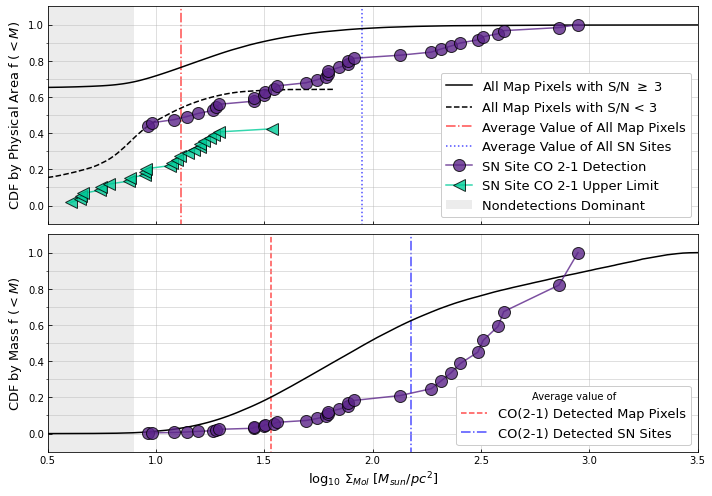

In [15]:
# Single Plot Metallicity Dependent Alpha

from matplotlib.ticker import AutoMinorLocator
minor_locator = AutoMinorLocator(2)
darkblue = '#245389'
darkpurple = '#5B2489'
ms = 12
fs = 14
fontsize = 13

# minorx = [4.5,4.75,5.0,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.0,7.25,7.5]
minory = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
fig, axs = plt.subplots(nrows=2,ncols=1, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)
axs[0].plot(logCDFAP_D_SM_x, AP_D_SM_PP_y, color = 'black', linestyle = '-', label = 'All Map Pixels with S/N $\geq$ 3')
axs[0].plot(logCDFAP_ND_SM_x, AP_ND_SM_PP_y, color = 'black', linestyle = '--', label = 'All Map Pixels with S/N < 3')
axs[0].set_ylabel(r'CDF by Physical Area f $ (<M$)',fontsize=fontsize)
# secax = axs[0].secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
# secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$', fontsize=fontsize)
axs[0].axvspan(xmin=0.5, xmax=np.log10(7.9), facecolor="gray", alpha=0.15, label = "Nondetections Dominant")
axs[0].set_xlim(0.5, 3.5)
axs[0].set_ylim(-0.1, 1.1)
axs[0].axvline(x=np.log10(13),ymin=-0.1,ymax=1.1,label="Average Value of All Map Pixels", ls="-.", color="red", alpha=0.7, zorder=0)
axs[0].axvline(x=np.log10(89),ymin=-0.1,ymax=1.1,label="Average Value of All SN Sites", ls=":", color="blue", alpha=0.7, zorder=0)

axs[0].plot(logCDFSN_D_SM_x, CDFSN_D_SM_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 0.8, label="SN Site CO 2-1 Detection")
axs[0].plot(logCDFSN_ND_SM_x, CDFSN_ND_SM_y, marker = '<',color = "#00cc99",mec='black', ms = ms, alpha = 0.8, label = "SN Site CO 2-1 Upper Limit")
axs[0].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1, fontsize = fontsize)
axs[0].tick_params(axis='both', direction = "in")
# axs[0].xaxis.set_minor_locator(minor_locator)
axs[0].yaxis.set_minor_locator(minor_locator)
axs[0].grid(which='both', alpha=0.5)
axs[1].plot(logCDFAP_D_only_SM_x, logCDFAP_D_only_SM_PP_y, color = 'black', linestyle = '-')
axs[1].plot(logCDFSN_D_only_SM_x, logCDFSN_D_only_SM_y, marker = 'o', ms = ms, color = darkpurple,mec='black', alpha = 0.8)
axs[1].set_ylabel(r'CDF by Mass f $ (< M $)', fontsize=fontsize)
axs[1].set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$',fontsize=fontsize)
axs[1].axvspan(xmin=0.5, xmax=np.log10(7.9), facecolor="gray", alpha=0.15)
axs[1].set_xlim(0.5, 3.5)
axs[1].set_ylim(-0.1, 1.1)
axs[1].axvline(x=np.log10(34),ymin=-0.1,ymax=1.1,label="CO(2-1) Detected Map Pixels", ls="--", color="red", alpha=0.7, zorder=0)
axs[1].axvline(x=np.log10(150),ymin=-0.1,ymax=1.1,label="CO(2-1) Detected SN Sites", ls="-.", color="blue", alpha=0.7, zorder=0)
# axs[1].xaxis.set_minor_locator(minor_locator)
axs[1].yaxis.set_minor_locator(minor_locator)
axs[1].grid(which='both', alpha=0.5)
axs[1].legend(frameon=True,loc='lower right',facecolor='white', framealpha=1,fontsize=fontsize, title="Average value of")
axs[1].tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ALLSNe.png', dpi=300)
plt.show()
plt.close()

In [10]:
print(logCDFAP_D_only_M_PP_per)
keep = np.isfinite(np.log10(AP_D_M_PP_x))
logTest= np.log10(AP_D_M_PP_x)[keep]
print(logTest)
logCDFAP_D_only_SM_per


[ 10652.58688232  54292.74329197 384985.32150218]
[2.57035962 2.57410345 2.5763285  ... 6.49533296 6.5043579  6.50802012]


<ipython-input-10-1fd75331cba4>:2: RuntimeWarning: divide by zero encountered in log10
  keep = np.isfinite(np.log10(AP_D_M_PP_x))
<ipython-input-10-1fd75331cba4>:3: RuntimeWarning: divide by zero encountered in log10
  logTest= np.log10(AP_D_M_PP_x)[keep]


array([ 17.82519633,  55.55933078, 324.3580604 ])

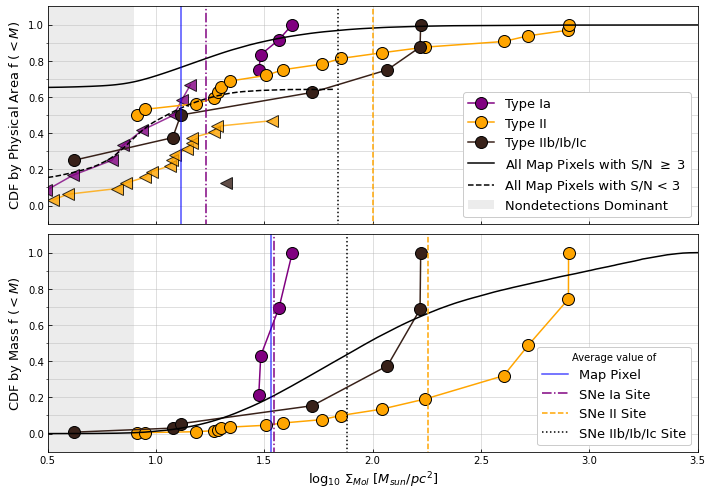

In [11]:
# Single Plot Sun+20 Alpha - All Types!
fontsize=13
ms = 12

fig, axs = plt.subplots(2,1, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(10)
# secax = axs[0].secondary_xaxis('top', functions=(mass2mgsd, mgsd2mass))
# secax.set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$', fontsize=fontsize)
axs[0].set_ylabel(r'CDF by Physical Area f $ (<M$)', fontsize=fontsize)
axs[0].axvspan(xmin=0.5, xmax=np.log10(7.9), facecolor="gray", alpha=0.15, label = "Nondetections Dominant")
axs[0].set_xlim(0.5, 3.5)
axs[0].set_ylim(-0.1, 1.1)
axs[0].plot(logCDFSN_D_SM_Ia_x, CDFSN_D_SM_Ia_y, marker = 'o', ms = ms, color = "purple",mec='black', alpha = 1.0, label="Type Ia")
axs[0].plot(logCDFSN_ND_SM_Ia_x, CDFSN_ND_SM_Ia_y, marker = '<',color = "purple", mec='black', ms = ms, alpha = 0.8)

axs[0].plot(logCDFSN_D_SM_II_x, CDFSN_D_SM_II_y, marker = 'o', ms = ms, color = "orange", mec='black', alpha = 1.0, label="Type II")
axs[0].plot(logCDFSN_ND_SM_II_x, CDFSN_ND_SM_II_y, marker = '<',color = "orange",mec='black', ms = ms, alpha = 0.8)

axs[0].plot(logCDFSN_D_SM_SESN_x, CDFSN_D_SM_SESN_y, marker = 'o', ms = ms, color = color3of3,mec='black', alpha = 1.0, label="Type IIb/Ib/Ic")
axs[0].plot(logCDFSN_ND_SM_SESN_x, CDFSN_ND_SM_SESN_y, marker = '<',color = color3of3,mec='black', ms = ms, alpha = 0.8)
axs[0].plot(logCDFAP_D_SM_x, AP_D_SM_PP_y, color = 'black', linestyle = '-', label = 'All Map Pixels with S/N $\geq$ 3')
axs[0].plot(logCDFAP_ND_SM_x, AP_ND_SM_PP_y, color = 'black', linestyle = '--', label = 'All Map Pixels with S/N < 3')
axs[0].axvline(x=np.log10(13),ymin=-0.1,ymax=1.1, ls="-", color="blue", alpha=0.7)
axs[0].axvline(x=np.log10(17),ymin=-0.1,ymax=1.1, ls="-.", color="purple", alpha=1.0)
axs[0].axvline(x=np.log10(100),ymin=-0.1,ymax=1.1, ls="--", color="orange", alpha=1.0)
axs[0].axvline(x=np.log10(69),ymin=-0.1,ymax=1.1, ls=":", color="black", alpha=1.0)

axs[0].yaxis.set_minor_locator(minor_locator)
axs[0].grid(which='both', alpha=0.5)
axs[0].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1, fontsize=fontsize)
axs[0].tick_params(axis='both', direction = "in")

axs[1].set_xlabel(r'$\log_{10}$ $\Sigma_{Mol}$ $[M_{sun}/pc^2]$', fontsize=fontsize)
axs[1].set_ylabel(r'CDF by Mass f $ (<M$)', fontsize=fontsize)
axs[1].axvspan(xmin=0.5, xmax=np.log10(7.9), facecolor="gray", alpha=0.15)
axs[1].set_xlim(0.5, 3.5)
axs[1].set_ylim(-0.1, 1.1)
axs[1].plot(logCDFSN_D_only_SM_Ia_x, logCDFSN_D_only_SM_Ia_y, marker = 'o', ms = ms, color = "purple",mec='black', alpha = 1.0)
axs[1].plot(logCDFSN_D_only_SM_II_x, logCDFSN_D_only_SM_II_y, marker = 'o', ms = ms, color = "orange", mec='black', alpha = 1.0)
axs[1].plot(logCDFSN_D_only_SM_SESN_x, logCDFSN_D_only_SM_SESN_y, marker = 'o', ms = ms, color = color3of3,mec='black', alpha = 1.0)
axs[1].plot(logCDFAP_D_only_SM_x, logCDFAP_D_only_SM_PP_y, color = 'black', linestyle = '-')
axs[1].yaxis.set_minor_locator(minor_locator)
axs[1].grid(which='both', alpha=0.5)
axs[1].axvline(x=np.log10(34),ymin=-0.1,ymax=1.1,label="Map Pixel", ls="-", color="blue", alpha=0.7)
axs[1].axvline(x=np.log10(35),ymin=-0.1,ymax=1.1,label="SNe Ia Site", ls="-.", color="purple", alpha=1.0)
axs[1].axvline(x=np.log10(180),ymin=-0.1,ymax=1.1,label="SNe II Site", ls="--", color="orange", alpha=1.0)
axs[1].axvline(x=np.log10(76),ymin=-0.1,ymax=1.1,label="SNe IIb/Ib/Ic Site", ls=":", color="black", alpha=1.0)

axs[1].legend(frameon=True,loc='lower right', facecolor='white', framealpha=1, title="Average value of", fontsize=fontsize)
axs[1].tick_params(axis='both', direction = "in")
plt.tight_layout()
plt.savefig('../Figures/CDF_Mass_ByType.png', dpi=300)
plt.show()
plt.close()

In [12]:
# Edited until here - CDFs all have different naming scheme now, below code will not run until names changed

In [13]:
def convertNCR(limarray, valarray):
    lims = np.zeros(len(limarray))
    array = np.concatenate((lims, valarray),0)
    ncr = array/array[-1]
    return(ncr)

print(len(logCDFnondetectionSESN_mgsd_mda), len(logCDFdetectionSESN_mgsd_mda))
allPix = convertNCR(logCDFAPLx_mgsd_mda, logCDFAPIx_mgsd_mda)
print(len(allPix))
yPix = np.linspace(0,1.0,len(allPix))
allIIs = convertNCR(logCDFnondetectionII_mgsd_mda, logCDFdetectionII_mgsd_mda)
yIIs = np.linspace(0,1.0,len(allIIs))
allSESN = convertNCR(logCDFnondetectionSESN_mgsd_mda, logCDFdetectionSESN_mgsd_mda)  
ySESN = np.linspace(0,1.0,len(allSESN))
allIas = convertNCR(logCDFnondetectionIa_mgsd_mda, logCDFdetectionIa_mgsd_mda) 
yIas = np.linspace(0,1.0,len(allIas))

print(allPix)
print(yPix)

import seaborn as sns

x, y = np.linspace(-0.01,1.01,100), np.linspace(-0.01,1.01,100)
fig = plt.figure(figsize = (6,6))
#sns.ecdfplot(allPix, label = "All Pixels")
sns.ecdfplot(allIas, label = "SNe Ia", color = color1of3, ls = "-.")
sns.ecdfplot(allIIs, label = "SNe II", color = color2of3, ls = "-")
sns.ecdfplot(allSESN, label = "SNe IIb,Ib,Ic", color = color3of3, ls = "--")
plt.legend(loc = "best", fontsize = 12)
plt.plot(x,y, color='grey',ls = "dotted")
plt.tick_params(axis = "both", which = "both", direction = "in")
plt.xlabel("NCR from CO Map", fontsize = 14)
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.01)
plt.ylabel("Fraction of SNe", fontsize = 14)
fig.savefig("../Figures/ECDFTypes.png", dpi=300)
plt.show()

NameError: name 'logCDFnondetectionSESN_mgsd_mda' is not defined

In [ ]:

YarrayAP = np.concatenate((APLy, APIy))
XarrayAP = np.concatenate((logCDFAPLx, logCDFAPIx))

YarraySNe = np.concatenate((ynondetection, ydetection))
XarraySNe = np.concatenate((logCDFnondetection, logCDFdetection))

# XarrayCA = np.concatenate((logCDFnondetection_mgsd_ca, logCDFdetection_mgsd_ca))
# YarrayCA = np.concatenate((ynondetection_mgsd_ca, ydetection_mgsd_ca))

XarrayMDA = np.concatenate((logCDFnondetection_mgsd_mda, logCDFdetection_mgsd_mda))
YarrayMDA = np.concatenate((ynondetection_mgsd_mda, ydetection_mgsd_mda))

# XarrayAP_CA = np.concatenate((logCDFAPLx_mgsd_ca, logCDFAPIx_mgsd_ca))
# YarrayAP_CA  = np.concatenate((APLy_mgsd_ca, APIy_mgsd_ca))

XarrayAP_MDA = np.concatenate((logCDFAPLx_mgsd_mda, logCDFAPIx_mgsd_mda))
YarrayAP_MDA = np.concatenate((APLy_mgsd_mda, APIy_mgsd_mda))

statsSNe     = findStats(YarraySNe, XarraySNe)
statsSNe.append(np.round(np.mean(XarraySNe),2))

# statsCA      = findStats(YarrayCA, XarrayCA)
# statsCA.append(np.round(np.mean(XarrayCA),2))

statsMDA     = findStats(YarrayMDA, XarrayMDA)
statsMDA.append(np.round(np.mean(XarrayMDA),2))

statsAP      = findStats(YarrayAP, XarrayAP)
statsAP.append(np.round(np.mean(XarrayAP),2))

# statsAP_CA   = findStats(YarrayAP_CA, XarrayAP_CA)
# statsAP_CA.append(np.round(np.mean(XarrayAP_CA),2))

statsAP_MDA  = findStats(YarrayAP_MDA, XarrayAP_MDA)
statsAP_MDA.append(np.round(np.mean(XarrayAP_MDA),2))


YarrayII = np.concatenate((ynondetectionII_mgsd_mda, ydetectionII_mgsd_mda))
XarrayII = np.concatenate((logCDFnondetectionII_mgsd_mda, logCDFdetectionII_mgsd_mda))

YarraySESN = np.concatenate((ynondetectionSESN_mgsd_mda, ydetectionSESN_mgsd_mda))
XarraySESN = np.concatenate((logCDFnondetectionSESN_mgsd_mda, logCDFdetectionSESN_mgsd_mda))

YarrayIa = np.concatenate((ynondetectionIa_mgsd_mda, ydetectionIa_mgsd_mda))
XarrayIa = np.concatenate((logCDFnondetectionIa_mgsd_mda, logCDFdetectionIa_mgsd_mda))

statsII     = findStats(YarrayII, XarrayII)
statsII.append(np.round(np.mean(XarraySNe),2))

statsIa      = findStats(YarrayIa, XarrayIa)
statsIa.append(np.round(np.mean(XarrayIa),2))

statsSESN     = findStats(YarraySESN, XarraySESN)
statsSESN.append(np.round(np.mean(XarraySESN),2))

MstatsAP   = mgsd2mass(statsAP_MDA, rnd = 2)
MstatsMDA  = mgsd2mass(statsMDA, rnd = 2)                 
MstatsII   = mgsd2mass(statsII, rnd = 2)
MstatsSESN = mgsd2mass(statsSESN, rnd = 2)
MstatsIa   = mgsd2mass(statsIa, rnd = 2)


CDFStats = Table({'Percentiles' : ["0.05","0.16","0.50","0.84","0.95", "Mean"],
                #'AllPixels'     : statsAP,
                #'AllCA'         : statsAP_CA,
                'AllMDA'        : MstatsAP,
                #'SNe'           : statsSNe,
                #'SNeCA'         : statsCA,
                'SNeMDA'        : MstatsMDA,                   
                'TypeSESN'       : MstatsSESN,
                'TypeII'        : MstatsII,
                'TypeIa'        : MstatsIa
                 })
CDFStats.write('../Data/3.2b.PercentilesStats.tex', format = 'latex', overwrite=True)

CDFStats
